## Домашнее задание : "Обучение с подкреплением"

# Задание 1

Обучите алгоритм Q-learning для сред FrozenLake-v1 и Blackjack-v1, в частности подберите оптимальную alpha. (1 балл)

## Utils

In [15]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output


import numpy as np 
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

In [18]:
def evaluate_policy(env, q_values, policy_method, gamma=1.0, n=100):
    rewards = []
    for _ in range(n):
        state = env.reset()[0]
        total_reward = 0
        done = False
        
        while not done:
            action = policy_method(q_values, state)
            state, reward, done, _, _ = env.step(action)
    
            total_reward += reward
        rewards.append(total_reward)
    return np.mean(rewards)

def print_policy(q_values):
    n = 4
    policy = np.array(np.argmax(q_values, axis=1)).reshape(n, n)
    policy_txt = np.chararray((n, n), 10)
    for i in range(n):
        for j in range(n):
            policy_txt[i][j] = i2action[policy[i][j]]
    print(policy_txt)

In [13]:
i2action = {
    0:'left',
    1:'down',
    2:'right',
    3:'up'
}

## FrozenLake

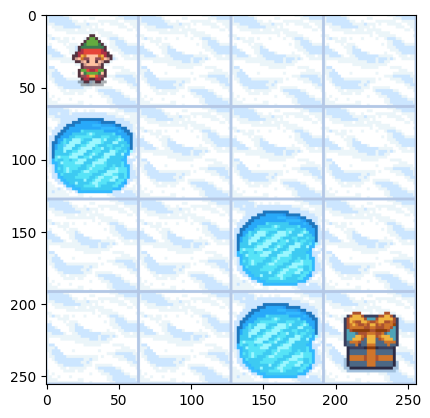

In [5]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array", desc=generate_random_map(size=4), is_slippery=False)
env.reset()
plt.imshow(env.render())

## Q-learning

In [34]:
env.reset()

(0, {'prob': 1})

In [19]:
def e_greedy_policy(q_values, state, eps=0.2):
    rand = np.random.rand()
    if rand < eps:
        return env.action_space.sample()
    else:
        return np.argmax(q_values[state])

def greedy_policy(q_values, state):
    return np.argmax(q_values[state])    

def q_learning(
    env,
    policy_method,
    episode_num=1000,
    gamma=1.0,
    alpha=0.1,
    eps=0.2
):
    q_values = np.zeros((env.observation_space.n, env.action_space.n)) 
    max_iter = 1000
    scores = []
    for ep in tqdm(range(episode_num)):
        state = env.reset()[0]
        done = False
        while not done:
            action = policy_method(q_values, state, eps)
            new_state, reward, done, _, p = env.step(action)
            prob = p["prob"]
            bellman = reward + gamma * np.max(q_values[new_state]) - q_values[state, action]
            q_values[state, action] += alpha * bellman 
            state = new_state
        score = evaluate_policy(env, q_values, policy_method, n=100)
        scores.append(score)
        if score > 1 - eps:
            break
    return q_values, scores

In [23]:
q_values, scores = q_learning(env, e_greedy_policy, episode_num=500, alpha=0.1, eps=0.2)

100%|██████████| 500/500 [00:08<00:00, 62.49it/s]


[[b'left' b'left' b'left' b'left']
 [b'left' b'left' b'left' b'left']
 [b'left' b'left' b'left' b'left']
 [b'left' b'left' b'left' b'left']]


/var/folders/3h/dhhfcbhd3pl2ss8czvd22c080000gn/T/ipykernel_37422/2682731595.py:19: DeprecationWarning: `np.chararray` is deprecated and will be removed from the main namespace in the future. Use an array with a string or bytes dtype instead.
  policy_txt = np.chararray((n, n), 10)


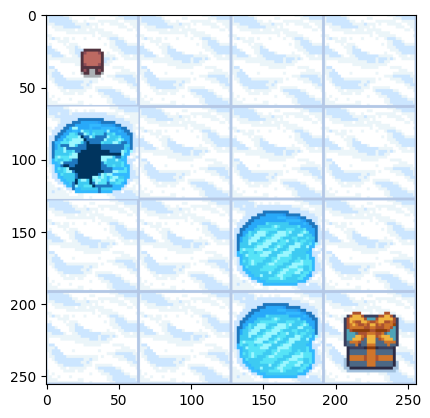

In [24]:
print_policy(q_values)
plt.imshow(env.render())

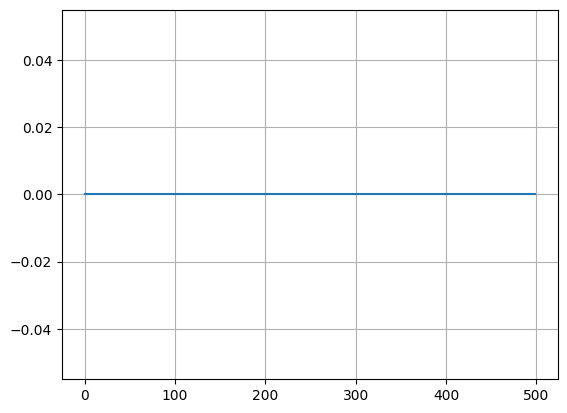

In [22]:
plt.plot(scores)
plt.grid()

## BlackJack

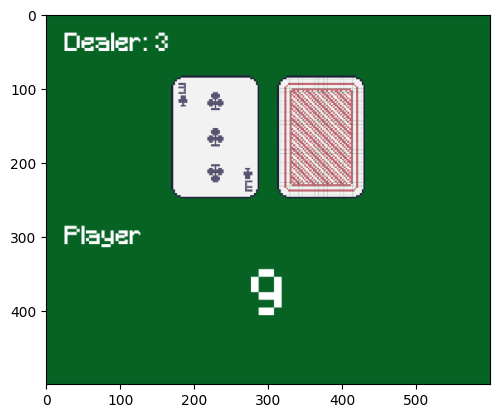

In [684]:
env = gym.make("Blackjack-v1", render_mode="rgb_array")
env.reset()
plt.imshow(env.render())

In [731]:
env.step(0)

((18, 3, False), 1.0, True, False, {})

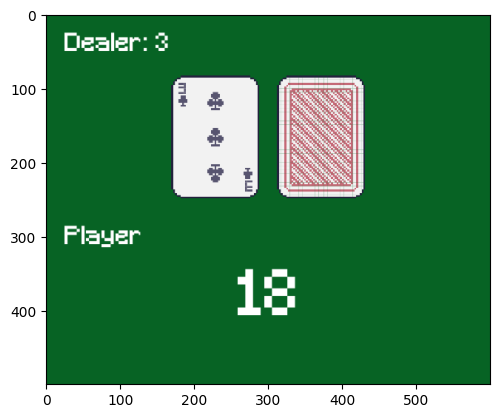

In [697]:
plt.imshow(env.render())

In [ ]:
def greedy_policy(q_values, state, eps=0.2):
    rand = np.random.rand()
    if rand < eps:
        return np.random.randint(env.action_space.n)
    else:
        return np.argmax(q_values[state])

def q_learning(
    env,
    episode_num=1000,
    gamma=1.0,
    alpha=0.1
):
    q_values = np.zeros((env.observation_space.n, env.action_space.n)) 
    max_iter = 1000
    scores = []
    for _ in tqdm(range(episode_num)):
        state = env.reset()[0]
        done = False
        while not done:
            action = greedy_policy(q_values, state)
            new_state, reward, done, _, p = env.step(action)
            prob = p["prob"]
            bellman = reward + gamma * np.max(q_values[new_state])
            q_values[state, action] += alpha * prob * bellman 
            state = new_state
        score = evaluate_policy(env, q_values, n=100)
        scores.append(score)
        if score > 0.9:
            break
    return q_values, scores

# Подбор числа эпизодов

# Задание 2

Обучите алгоритм Policy Gradients (или Actor Critic) для среды https://www.gymlibrary.dev/environments/atari/breakout/ . Продемонстрируйте, что для обученного агента растет время игры. (2 балла)